# Example of Liftingline Analysis

In [1]:
# numpy and matplotlib imports
import numpy as np
from matplotlib import pyplot as plt

# import of wingstructure submodels
from wingstructure import data, aero

## Creating wing defintion

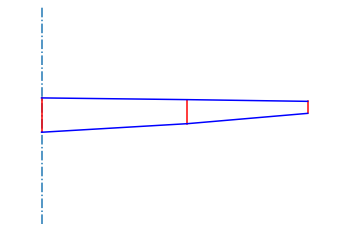

In [2]:
# create wing object
wing = data.Wing()

# add sections to wing
# leading edge position, chord length, twist
wing.append((0.0, 0.0, 0.0), 1.0, 0.0)
wing.append((0.05, 4.25, 0.0), 0.7, 0.0)
wing.append((0.1, 7.75, 0.0), 0.35, 0.0)

# define spoiler position
wing.add_controlsurface('BK', 1.5, 2.9, 0.5, 0.5, 'airbrake')

# define control-surfaces
wing.add_controlsurface('flap', 1, 2.8, 0.3, 0.3, 'aileron')
wing.add_controlsurface('flap2', 4.25, 7, 0.3, 0.2, 'aileron')

wing.plot()

## Lift calculation using LiftAnalysis object

The LiftAnalysis object calculates base lift distributions (e.q. for aerodynamical twist, control surfaces and so on) and only superposes those, when calculations are invoked.

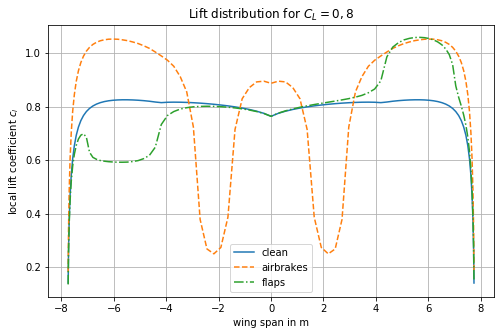

In [3]:
liftana = aero.LiftAnalysis.generate(wing)

span_pos = liftana.ys

α, distribution, C_Dib = liftana.calculate(C_L=0.8)
α_qr, distribution_q, C_Dia = liftana.calculate(C_L=0.8, 
            controls={'flap2': [5, -5]})
α_ab, distribution_ab, C_Di = liftana.calculate(C_L=0.8, airbrake=True)

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='airbrakes')
plt.plot(span_pos, distribution_q, '-.', label='flaps')
plt.xlabel('wing span in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')
plt.savefig('Liftdistribution.pdf')

## Lift calculation using calculate function

The calculate function does only calculate those distributions needed and does not cache results. Furhtermore it allows for calculation of moment coefficent regarding x axis (flight direction). This coefficient is defined as follows:

$$ C_\mathrm{Mx} = \frac{M_\mathrm{x}}{q S b}.$$

$q$ - dynamic pressure

$S$ - wing surface

$b$ - wing span


In [4]:
aero.calculate(wing, target=1.0, controls={'flap':(5,-5)}, calc_cmx=True)

{'c_ls': array([0.17487668, 0.33353563, 0.4704887 , 0.58517686, 0.6792014 ,
        0.75518629, 0.81595462, 0.86423713, 0.90239525, 0.93247292,
        0.95608587, 0.97459429, 0.98900539, 1.00018677, 1.00872982,
        1.01518769, 1.01988317, 1.02317939, 1.02522284, 1.02626438,
        1.02632239, 1.02557987, 1.02393838, 1.02152955, 1.01809999,
        1.01369297, 1.00768364, 1.0019141 , 0.99931806, 0.99404527,
        0.98434223, 0.96935357, 0.93614791, 0.85080415, 0.82039809,
        0.80936834, 0.80499276, 0.80785093, 0.81716706, 0.84467865,
        0.92126058, 0.94685751, 0.95473279, 0.95520178, 0.98356426,
        1.01149414, 1.05312472, 1.14283033, 1.18141317, 1.20012052,
        1.21103074, 1.21351931, 1.20831849, 1.18275022, 1.1012997 ,
        1.07099658, 1.05785867, 1.04874626, 1.04249382, 1.03634886,
        1.03632064, 1.03764549, 1.03867871, 1.03922803, 1.03950127,
        1.03925529, 1.03857183, 1.03721552, 1.03518086, 1.03220868,
        1.0281953 , 1.02281175, 1.015816